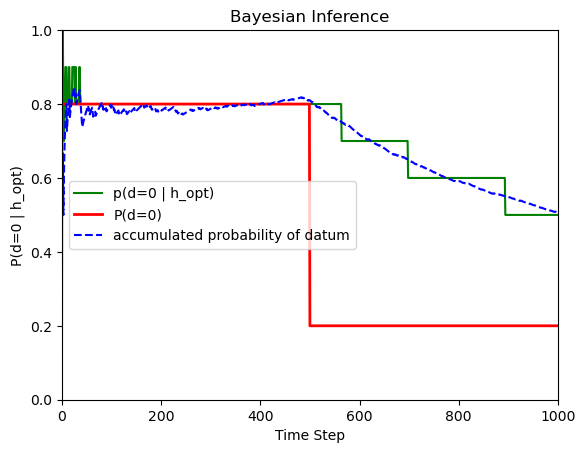

In [1]:
import numpy as np
from fractions import Fraction
import matplotlib.pyplot as plt
import random

class Bayesian_learner:
    def __init__(self, h_prob, h_likelihood, d_prob):
        self.h_prob = np.array(h_prob)
        self.h_likelihood = h_likelihood  # 辞書形式で渡される
        self.d_prob = d_prob
    
    def bayesian_update(self, data):
        # 尤度を辞書から取得（関数呼び出しではなく、辞書アクセス）
        h_likelihood = self.h_likelihood[data]
        
        # ベイズの定理の計算
        h_post_prob = (self.h_prob * h_likelihood) / self.d_prob
        
        # ベイズ更新 + 正規化
        self.h_prob = h_post_prob / h_post_prob.sum()
        
        return self.h_prob
    
    def change_d_prob(self, new_d_prob):
        self.d_prob = new_d_prob
        
# 仮説の事前確率を一様分布で設定
h_prob = [Fraction(1, 11)] * 11  # 11個の仮説のそれぞれに 1/11 を割り当て

# 仮説の尤度を0.1刻みで設定
h_likelihood = {
    0: np.array([Fraction(i, 10) for i in range(11)]),        # 0, 0.1, 0.2, ..., 1.0
    1: np.array([Fraction(10 - i, 10) for i in range(11)])    # 1.0, 0.9, 0.8, ..., 0.0
}
# データの無条件確率
d_prob = Fraction(8, 10)
new_d_prob = Fraction(2, 10)

# エージェントの作成
bayesian_learner = Bayesian_learner(h_prob, h_likelihood, d_prob)

# シミュレーションのステップ数
num_steps = 1000
change_time = 500

# プロットの準備
time_steps = list(range(num_steps))  # 時刻は 0, 1, 2, 3, ... と 1 刻み
p_d_given_h_opt = []
d_prob_values = [float(d_prob) if t < change_time else float(new_d_prob) for t in range(num_steps)]

# 累積頻度を計算するための変数
cumulative_0_count = 0  # 観測された d=0 の数
cumulative_frequencies = []

for t in range(num_steps):
    # 最初のステップは事前確率を表示
    if t == 0:
        h_post_prob = np.array([float(prob) for prob in h_prob])
    else:
        # 現在の d_prob を使用してデータを生成
        d = 0 if random.random() < float(bayesian_learner.d_prob) else 1
        # print(f"時刻 {t} の観測データ: {d}")
        
        # ベイズ学習を実行して事後確率を取得
        h_post_prob = bayesian_learner.bayesian_update(d)
        
        if d == 0:
            cumulative_0_count += 1
        cumulative_frequency = cumulative_0_count / (t + 1)
        cumulative_frequencies.append(cumulative_frequency)
        
    # 最も大きい事後確率のインデックスを取得し、その仮説を h_opt とする
    h_opt_index = np.argmax(h_post_prob)
    
    # h_opt の尤度 p(d=1 | h_opt) を取得し、保存
    p_d_given_h_opt_value = float(bayesian_learner.h_likelihood[0][h_opt_index])
    p_d_given_h_opt.append(p_d_given_h_opt_value)
    
    # print(f"時刻 {t} の最適仮説 h_opt の尤度: {p_d_given_h_opt_value}")
    
    # 無条件確率を途中で変更する例
    if t == change_time:
        bayesian_learner.change_d_prob(new_d_prob)
        
plt.plot(time_steps, p_d_given_h_opt, label='p(d=0 | h_opt)', color='green')
plt.plot(time_steps, d_prob_values, 'r-', linewidth=2, label='P(d=0)')
plt.plot(time_steps[1:], cumulative_frequencies, color='blue', linestyle='--', label='accumulated probability of datum')
plt.xlim(0, 1000)
plt.ylim(0.0, 1.0)
plt.xlabel('Time Step')
plt.ylabel('P(d=0 | h_opt)')
plt.title('Bayesian Inference')
plt.legend()
plt.show()